In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
%matplotlib inline
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indic

In [2]:
df = pd.read_csv('iris-data.csv')
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


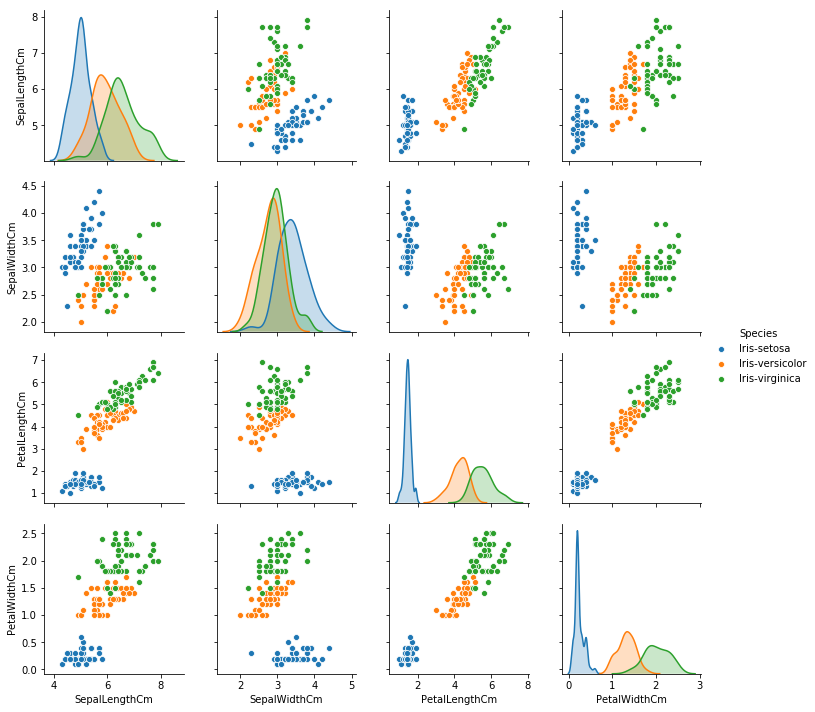

In [3]:
sb.pairplot(df, hue='Species')

In [4]:
x = df[['PetalWidthCm', 'PetalLengthCm']].values
y = df['Species'].values

std = StandardScaler()
le = LabelEncoder()

x_std = std.fit_transform(x)
y = le.fit_transform(y)

print(x[:10])
print(y[:10])

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

[[0.2 1.4]
 [0.2 1.4]
 [0.2 1.3]
 [0.2 1.5]
 [0.2 1.4]
 [0.4 1.7]
 [0.3 1.4]
 [0.2 1.5]
 [0.2 1.4]
 [0.1 1.5]]
[0 0 0 0 0 0 0 0 0 0]


In [5]:
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

Accuracy: 0.956


/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


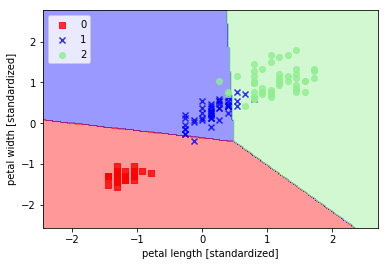

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1.0, random_state=0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

plot_decision_regions(x_std, y, classifier=lr)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')    
plt.show()

Accuracy: 0.956


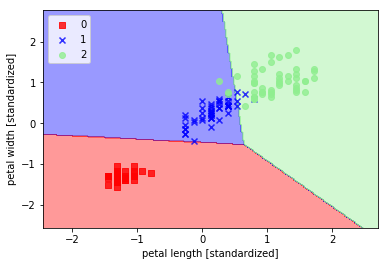

In [7]:
lr = LogisticRegression(C=10.0, random_state=0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

plot_decision_regions(x_std, y, classifier=lr)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')    
plt.show()

Accuracy: 0.956


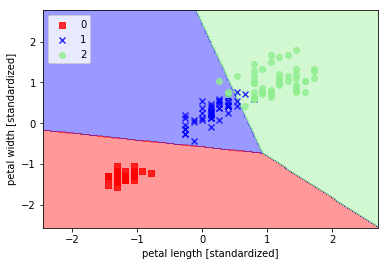

In [8]:
lr = LogisticRegression(C=50.0, random_state=0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

plot_decision_regions(x_std, y, classifier=lr)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')    
plt.show()

Accuracy: 0.956


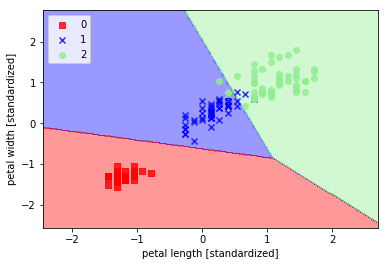

In [9]:
lr = LogisticRegression(C=100.0, random_state=0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

plot_decision_regions(x_std, y, classifier=lr)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')    
plt.show()

Accuracy: 0.956


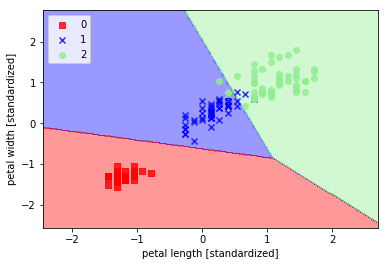

In [10]:
lr = LogisticRegression(C=100.0, random_state=5)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

plot_decision_regions(x_std, y, classifier=lr)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [11]:
x = df[df.columns[:-1]].values
y = df['Species'].values

std = StandardScaler()
le = LabelEncoder()

x_std = std.fit_transform(x)
y = le.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

print(x_train[:10])
print(y_train[:10])

[[ 0.06866179 -0.1249576   0.25096731  0.39617188]
 [ 0.18982966  0.80065426  0.42156442  0.52764485]
 [ 0.67450115 -0.35636057  0.30783301  0.13322594]
 [ 1.2803405   0.10644536  0.76275864  1.44795564]
 [ 0.31099753 -1.05056946  1.04708716  0.26469891]
 [ 1.03800476  0.10644536  0.36469871  0.26469891]
 [-0.05250608 -0.8191665   0.08037019  0.00175297]
 [-0.53717756  0.80065426 -1.17067529 -1.31297673]
 [-0.17367395 -0.35636057  0.25096731  0.13322594]
 [ 1.03800476  0.56925129  1.10395287  1.1850097 ]]
[1 1 1 2 2 1 1 0 1 2]


In [12]:
%%time
lr = LogisticRegression(C=100.0, random_state=5)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978
CPU times: user 4.94 ms, sys: 3.41 ms, total: 8.35 ms
Wall time: 2.43 ms


In [13]:
%%time
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.956
CPU times: user 36.1 ms, sys: 12.9 ms, total: 49 ms
Wall time: 16.3 ms


In [14]:
%%time
lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978
CPU times: user 120 ms, sys: 13.7 ms, total: 134 ms
Wall time: 88.2 ms


In [15]:
%%time
lr = LogisticRegression(solver='saga')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978
CPU times: user 5.01 ms, sys: 1.43 ms, total: 6.43 ms
Wall time: 5.22 ms


In [16]:
%%time
lr = LogisticRegression(max_iter=1000, solver='saga', penalty='l1')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978
CPU times: user 13.5 ms, sys: 1.34 ms, total: 14.8 ms
Wall time: 13.7 ms


In [17]:
%%time
lr = LogisticRegression(solver='sag')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978
CPU times: user 3.22 ms, sys: 1.25 ms, total: 4.47 ms
Wall time: 3.35 ms


In [18]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(max_iter=1000)

c = np.array([0.1, 1, 10, 100])
solver = np.array(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])

grid = GridSearchCV(estimator=lr, param_grid=dict(C=c, solver=solver))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_solver', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(20)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,param_solver,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.1,newton-cg,0.009313,0.000185,0.889978,0.873333,16
1,0.1,lbfgs,0.004615,0.000189,0.889978,0.873333,16
2,0.1,liblinear,0.000464,0.000217,0.846900,0.833333,20
3,0.1,sag,0.001612,0.000178,0.889978,0.873333,16
4,0.1,saga,0.001490,0.000171,0.889978,0.873333,16
5,1,newton-cg,0.008623,0.000181,0.940087,0.913333,11
6,1,lbfgs,0.005627,0.000171,0.940087,0.913333,11
7,1,liblinear,0.000528,0.000166,0.916716,0.900000,15
8,1,sag,0.001873,0.000170,0.940087,0.913333,11
9,1,saga,0.003508,0.000177,0.940087,0.913333,11
